In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv(r'../Datasets/placement_marks.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

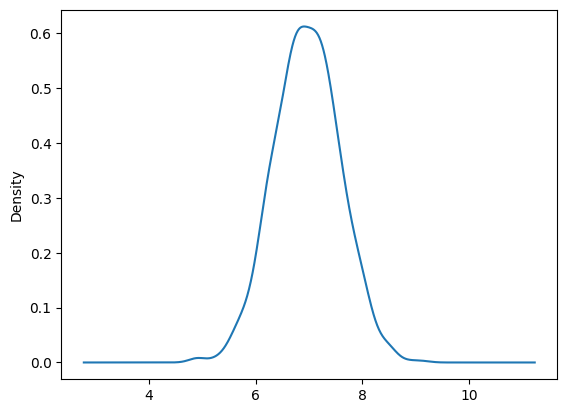

In [18]:
df['cgpa'].plot(kind='kde')


<Axes: ylabel='Density'>

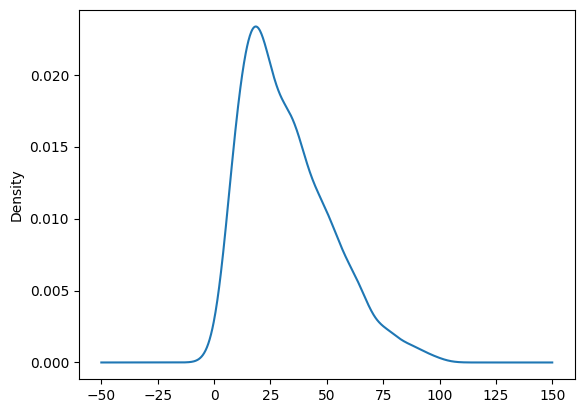

In [19]:
df['placement_exam_marks'].plot(kind='kde')

In [20]:
cgpa_mean,cgpa_std,cgpa_max,cgpa_min=df['cgpa'].mean(),df['cgpa'].std(),df['cgpa'].max(),df['cgpa'].min()

In [21]:
print('Mean:',cgpa_mean)
print('STD:',cgpa_std)
print('Max:',cgpa_max)
print('Min:',cgpa_min)

Mean: 6.96124
STD: 0.6158978751323896
Max: 9.12
Min: 4.89


In [22]:
upper_limit=cgpa_mean+3*cgpa_std
lower_limit=cgpa_mean-3*cgpa_std

print("upper limit:",upper_limit)
print("Lower limit:",lower_limit)

upper limit: 8.808933625397168
Lower limit: 5.113546374602832


In [ ]:
df[(df['cgpa']>upper_limit) | (df['cgpa']<lower_limit)] # outlier observations

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [26]:
df.shape

(1000, 3)

#### Trimming

In [27]:
new_df=df[(df['cgpa']<upper_limit ) & (df['cgpa']> lower_limit)]
new_df.shape

(995, 3)

### detect outlier using z-score

In [28]:
df['z-score_cgpa']=(df['cgpa']-cgpa_mean)/cgpa_std
df.head()

,cgpa,placement_exam_marks,placed,z-score_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [29]:
df[df['z-score_cgpa']>3]

,cgpa,placement_exam_marks,placed,z-score_cgpa
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [31]:
df[df['z-score_cgpa']<-3]

,cgpa,placement_exam_marks,placed,z-score_cgpa
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [32]:
df.shape

(1000, 4)

In [33]:
new_df=df[(df['z-score_cgpa']<3 ) & (df['z-score_cgpa']> -3)]
new_df.shape

(995, 4)

#### Capping

In [34]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [35]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [36]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

#### Working on Skewed Data

In [73]:
df=pd.read_csv(r'../Datasets/placement_marks.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [74]:
import seaborn as sns

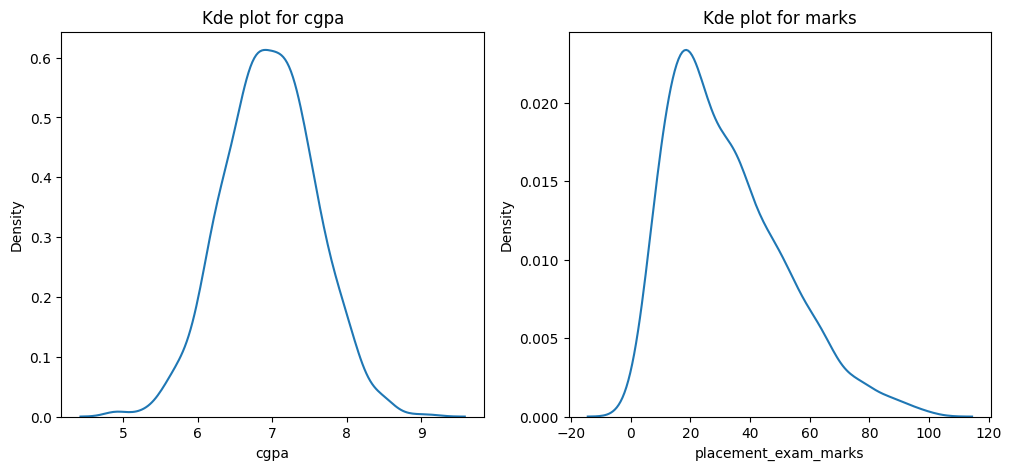

In [75]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x='cgpa')
plt.title("Kde plot for cgpa")

plt.subplot(1,2,2)
sns.kdeplot(data=df,x='placement_exam_marks')
plt.title("Kde plot for marks")

plt.show()

In [76]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

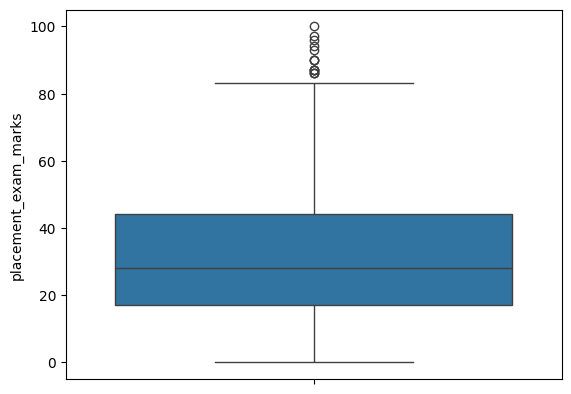

In [77]:
sns.boxplot(df['placement_exam_marks'])

In [78]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [79]:
iqr=percentile75-percentile25

In [80]:
iqr

np.float64(27.0)

In [81]:
upper_limit=percentile75+(1.5 * iqr)
lower_limit=percentile25 - (1.5* iqr )

In [82]:
upper_limit

np.float64(84.5)

In [83]:
df[(df['placement_exam_marks'] > upper_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [84]:
df[(df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed


In [85]:
new_df=df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

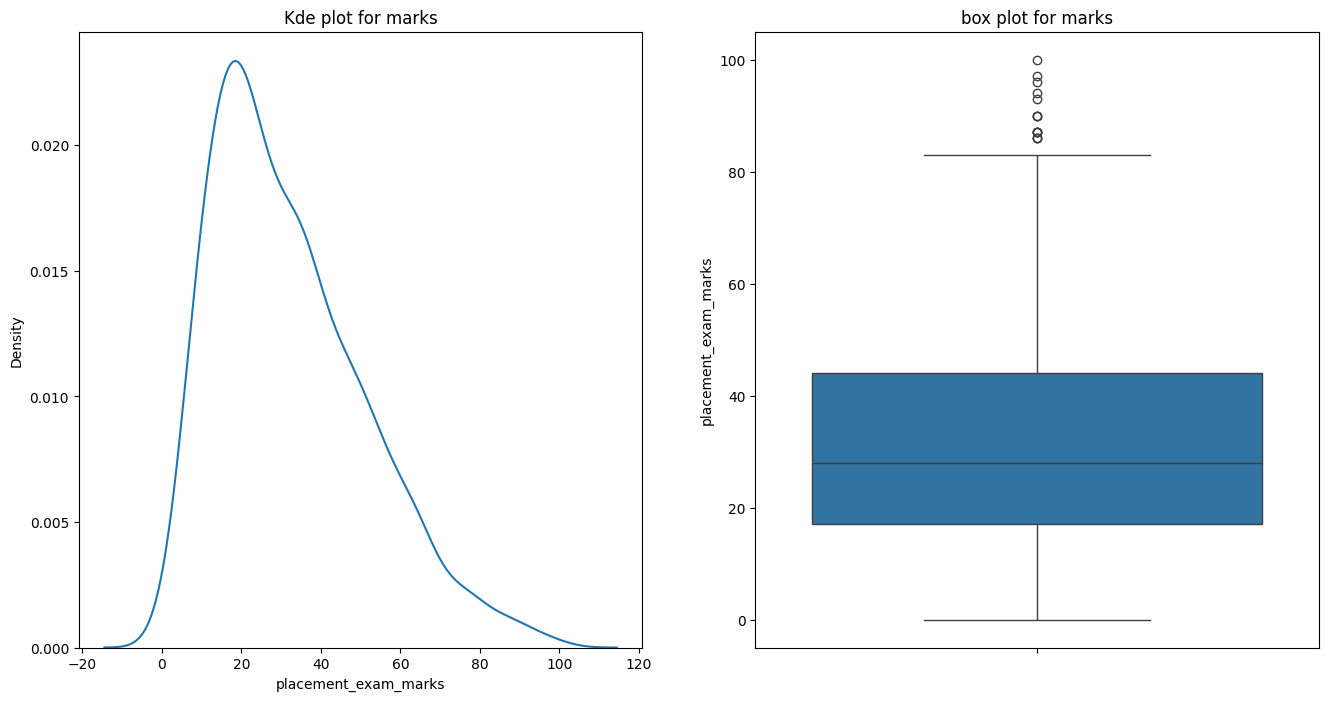

In [86]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x='placement_exam_marks')
plt.title("Kde plot for marks")

plt.subplot(1,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.title("box plot for marks")

plt.show()

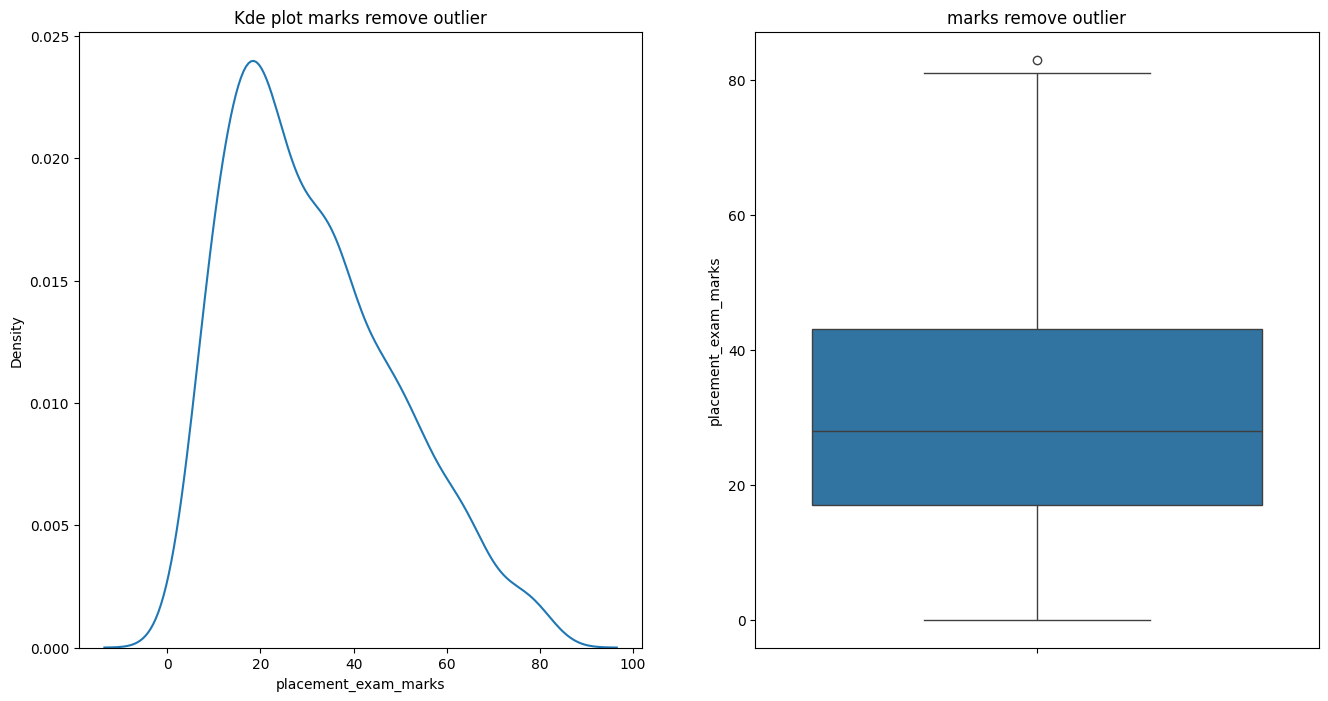

In [87]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.kdeplot(data=new_df,x='placement_exam_marks')
plt.title("Kde plot marks remove outlier")

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])
plt.title("marks remove outlier")

plt.show()

### Capping

In [88]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [89]:
upper_limit

np.float64(84.5)

In [90]:
lower_limit

np.float64(-23.5)

In [91]:
df['placement_exam_marks']=np.where(
                                    df['placement_exam_marks']>upper_limit,upper_limit,
                                    np.where(df['placement_exam_marks']<lower_limit,lower_limit,
                                    df['placement_exam_marks'])
                                    )

In [92]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

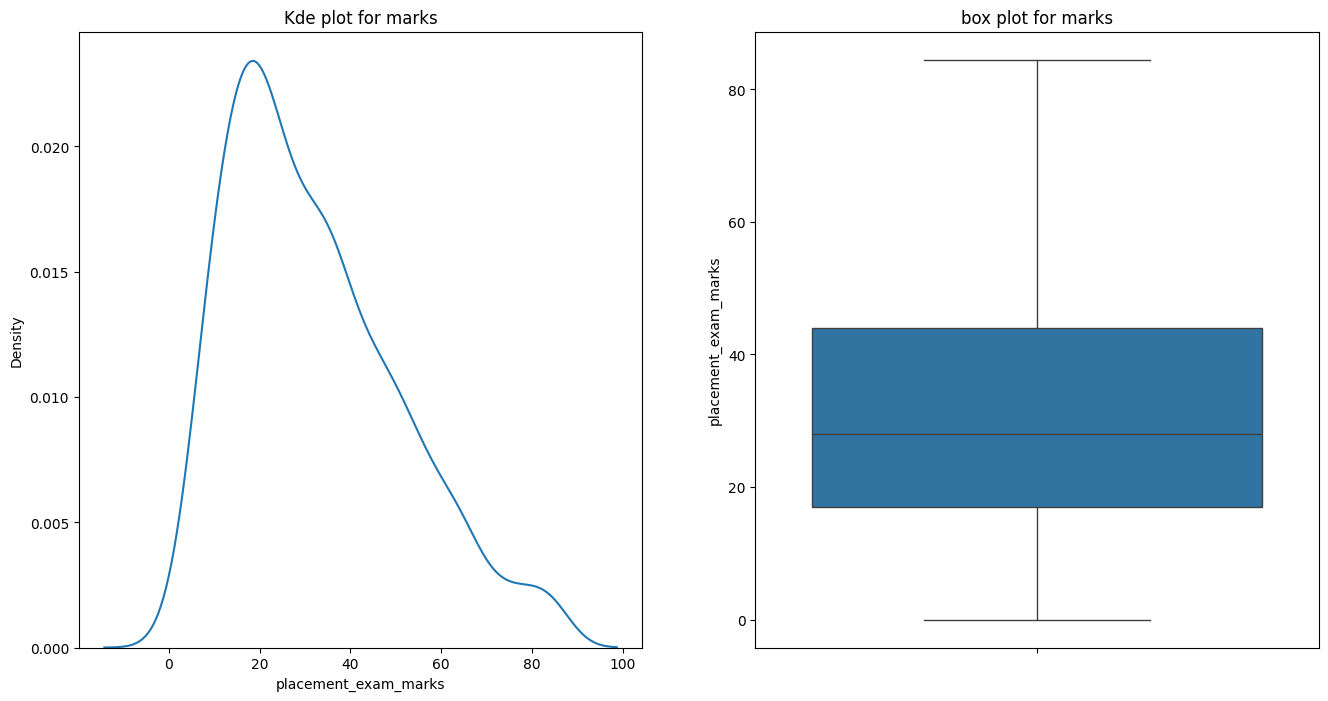

In [93]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x='placement_exam_marks')
plt.title("Kde plot for marks")

plt.subplot(1,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.title("box plot for marks")

plt.show()

#### Outlier Detection using Percentile method

In [94]:
df=pd.read_csv(r'../Datasets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [95]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

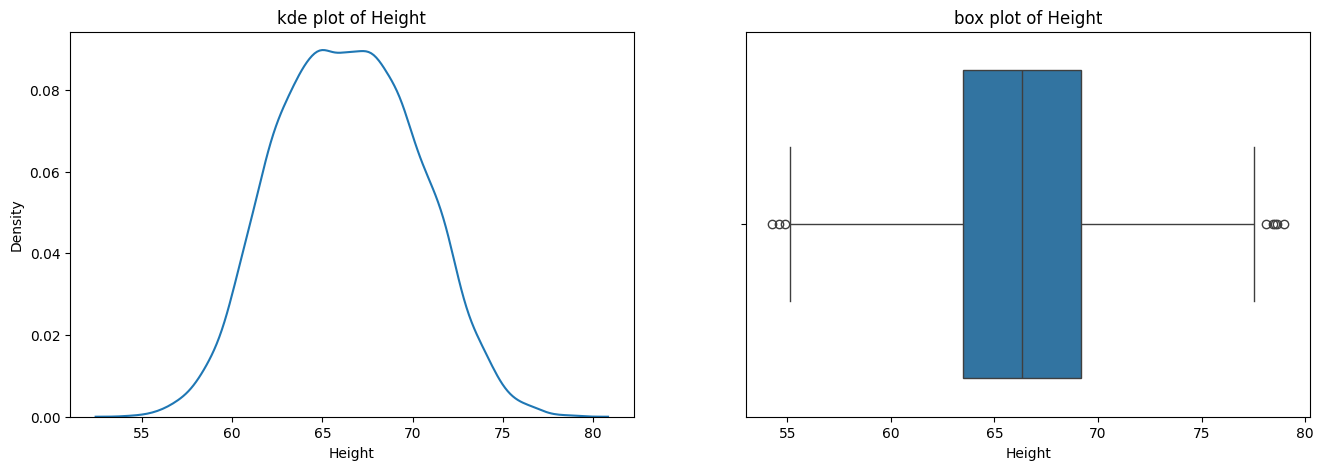

In [97]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x='Height')
plt.title("kde plot of Height")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='Height')
plt.title("box plot of Height")

plt.show()

In [98]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)

upper_limit,lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

### trimming

In [99]:
df.shape

(10000, 3)

In [102]:
df[(df['Height']>=upper_limit) | (df['Height']<=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [103]:
new_df=df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]

In [104]:
new_df.shape

(9800, 3)

In [105]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

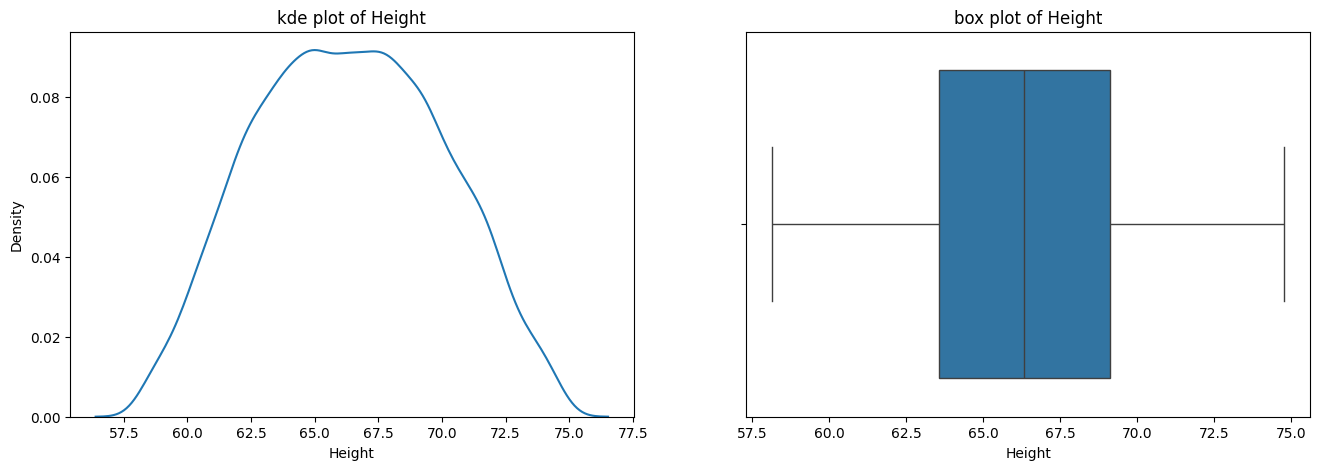

In [106]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.kdeplot(data=new_df,x='Height')
plt.title("kde plot of Height")

plt.subplot(1,2,2)
sns.boxplot(data=new_df,x='Height')
plt.title("box plot of Height")

plt.show()

### Capping

In [107]:
df['Height']=np.where(
                    df['Height']>upper_limit,upper_limit,
                    np.where(df['Height']<lower_limit,lower_limit,
                    df['Height'])
                    )

In [108]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

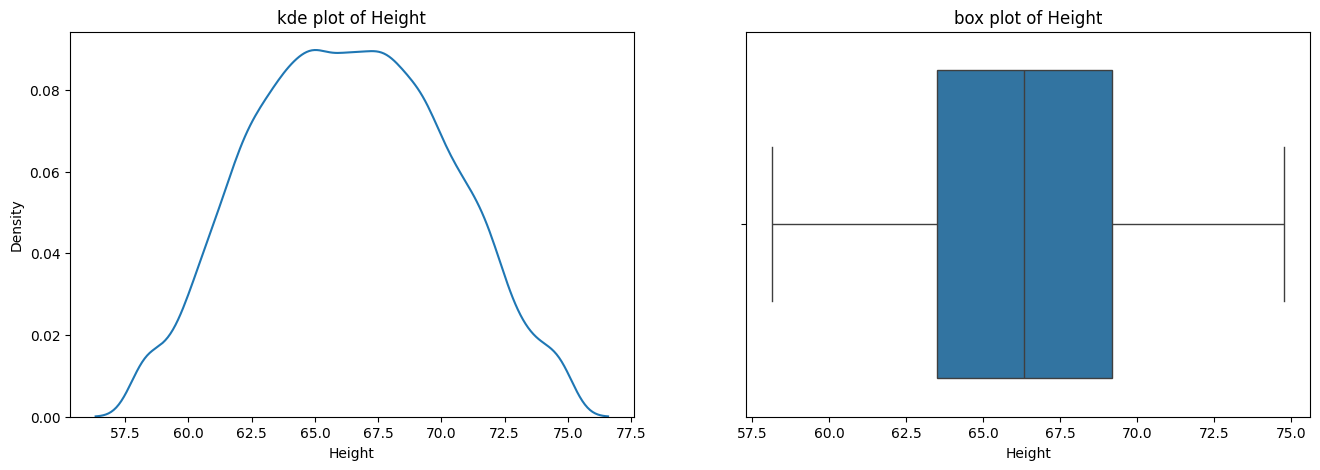

In [109]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.kdeplot(data=df,x='Height')
plt.title("kde plot of Height")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='Height')
plt.title("box plot of Height")

plt.show()